# Predictive Analytics For Patient Discharge Using Electronic Health Records

Name: Shrey Sanjay Kekade

Student ID: x23194316@student.ncirl.ie

Notebook Execution Time : 14 Seconds

# Import Libraries

In [1]:
# Essential libraries for data manipulation and visualization
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Scikit-learn: Preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder, PowerTransformer
from sklearn.decomposition import PCA


# Statsmodels for multicollinearity checks
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Increase font size globally
from matplotlib import rcParams
rcParams.update({'font.size': 12})

# Suppress warnings for cleaner outputs
import warnings
warnings.filterwarnings("ignore")


# Import Dataset

The dataset is Electronic Health Record Predicting collected from a private Hospital in Indonesia. It contains the patients laboratory test results used to determine next patient treatment whether in care or out care patient. The task embedded to the dataset is classification prediction.

https://data.mendeley.com/datasets/7kv3rctx7m/1

In [2]:
# Load the dataset
df = pd.read_csv('EHR_data.csv')

In [3]:
df.head()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,35.1,11.8,4.65,6.3,310,25.4,33.6,75.5,1,F,out
1,43.5,14.8,5.39,12.7,334,27.5,34.0,80.7,1,F,out
2,33.5,11.3,4.74,13.2,305,23.8,33.7,70.7,1,F,out
3,39.1,13.7,4.98,10.5,366,27.5,35.0,78.5,1,F,out
4,30.9,9.9,4.23,22.1,333,23.4,32.0,73.0,1,M,out


# Exploratory Data Analysis

## Descriptive Statistics

In [4]:
# Initial exploration
print("Dataset Information:")
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4412 entries, 0 to 4411
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HAEMATOCRIT   4412 non-null   float64
 1   HAEMOGLOBINS  4412 non-null   float64
 2   ERYTHROCYTE   4412 non-null   float64
 3   LEUCOCYTE     4412 non-null   float64
 4   THROMBOCYTE   4412 non-null   int64  
 5   MCH           4412 non-null   float64
 6   MCHC          4412 non-null   float64
 7   MCV           4412 non-null   float64
 8   AGE           4412 non-null   int64  
 9   SEX           4412 non-null   object 
 10  SOURCE        4412 non-null   object 
dtypes: float64(7), int64(2), object(2)
memory usage: 379.3+ KB


In [5]:
print("\nFirst 5 Rows of the Dataset:")
df.head()


First 5 Rows of the Dataset:


,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,35.1,11.8,4.65,6.3,310,25.4,33.6,75.5,1,F,out
1,43.5,14.8,5.39,12.7,334,27.5,34.0,80.7,1,F,out
2,33.5,11.3,4.74,13.2,305,23.8,33.7,70.7,1,F,out
3,39.1,13.7,4.98,10.5,366,27.5,35.0,78.5,1,F,out
4,30.9,9.9,4.23,22.1,333,23.4,32.0,73.0,1,M,out


In [6]:
# Check for missing values
print("\nMissing Values in the Dataset:")
print(df.isnull().sum())


Missing Values in the Dataset:
HAEMATOCRIT     0
HAEMOGLOBINS    0
ERYTHROCYTE     0
LEUCOCYTE       0
THROMBOCYTE     0
MCH             0
MCHC            0
MCV             0
AGE             0
SEX             0
SOURCE          0
dtype: int64


In [7]:
# Summary statistics
print("\nSummary Statistics:")
df.describe()


Summary Statistics:


,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE
count,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000
mean,38.197688,12.741727,4.541260,8.718608,257.524479,28.234701,33.343042,84.612942,46.626473
std,5.974784,2.079903,0.784091,5.049041,113.972365,2.672639,1.228664,6.859101,21.731218
min,13.700000,3.800000,1.480000,1.100000,8.000000,14.900000,26.000000,54.000000,1.000000
25%,34.375000,11.400000,4.040000,5.675000,188.000000,27.200000,32.700000,81.500000,29.000000
50%,38.600000,12.900000,4.570000,7.600000,256.000000,28.700000,33.400000,85.400000,47.000000
75%,42.500000,14.200000,5.050000,10.300000,321.000000,29.800000,34.100000,88.700000,64.000000
max,69.000000,18.900000,7.860000,76.600000,1183.000000,40.800000,39.000000,115.600000,99.000000


## Visualizations

### Distribution of variables based on the target variable

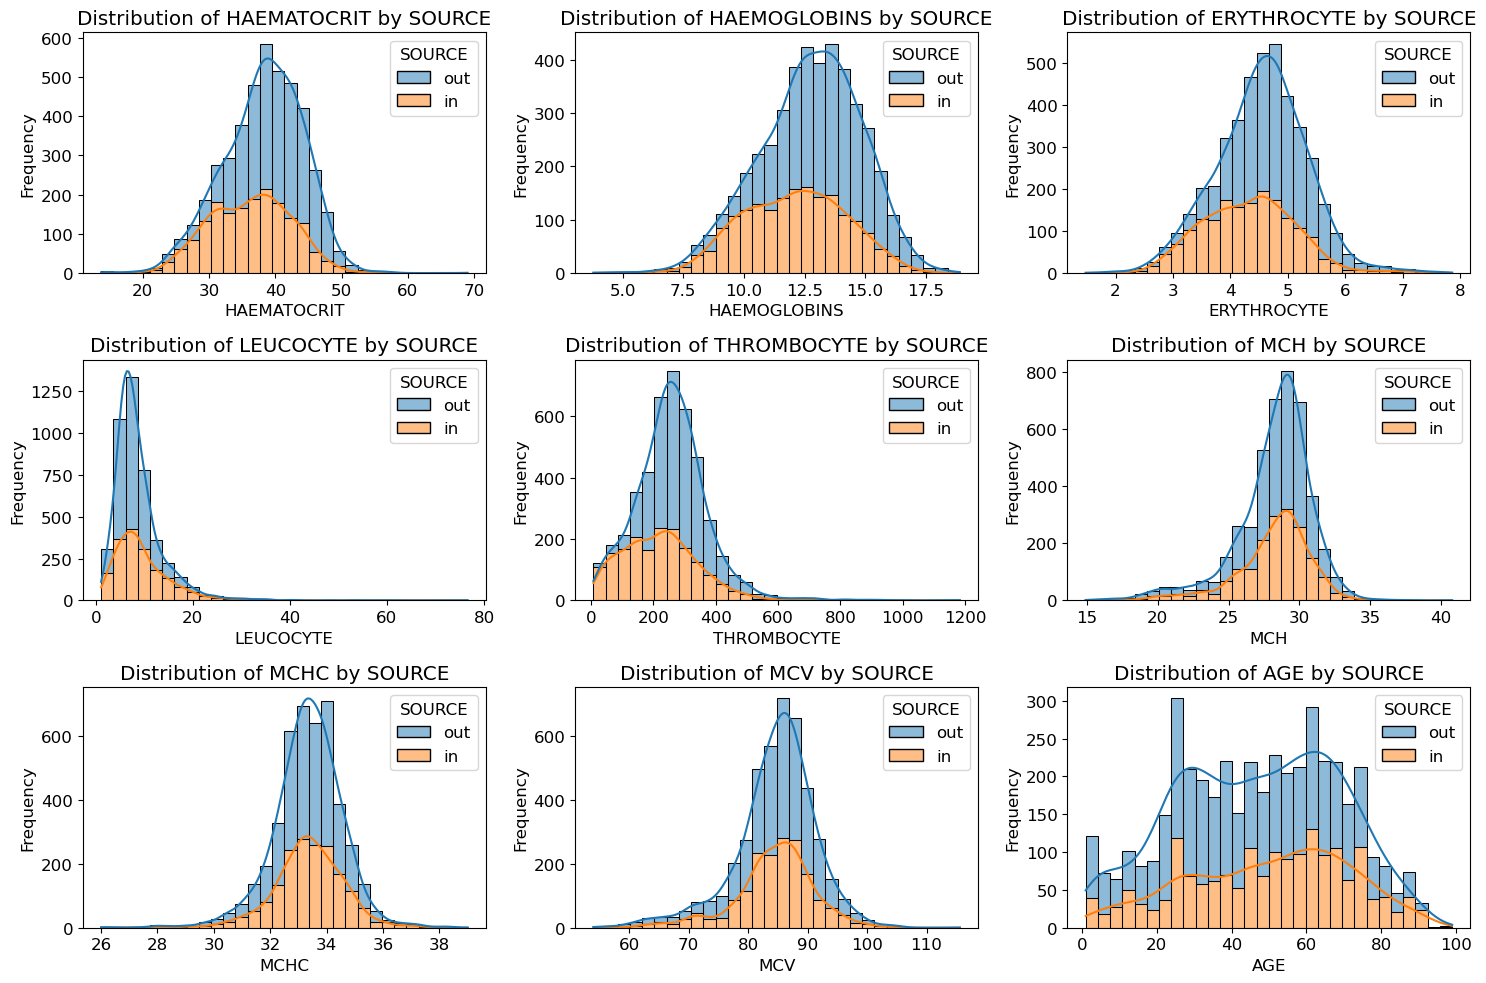

In [8]:
# Distribution plots for numerical features based on the target variable
plt.figure(figsize=(15, 10))
numerical_columns = [
    'HAEMATOCRIT', 'HAEMOGLOBINS', 'ERYTHROCYTE', 'LEUCOCYTE',
    'THROMBOCYTE', 'MCH', 'MCHC', 'MCV', 'AGE']
target_variable = 'SOURCE'  

for i, col in enumerate(numerical_columns):
    plt.subplot(3, 3, i + 1)
    sns.histplot(data=df, x=col, hue=target_variable, kde=True, bins=30, multiple='stack')
    plt.title(f'Distribution of {col} by {target_variable}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    
plt.tight_layout()
plt.show()


### Box plots to check for outliers

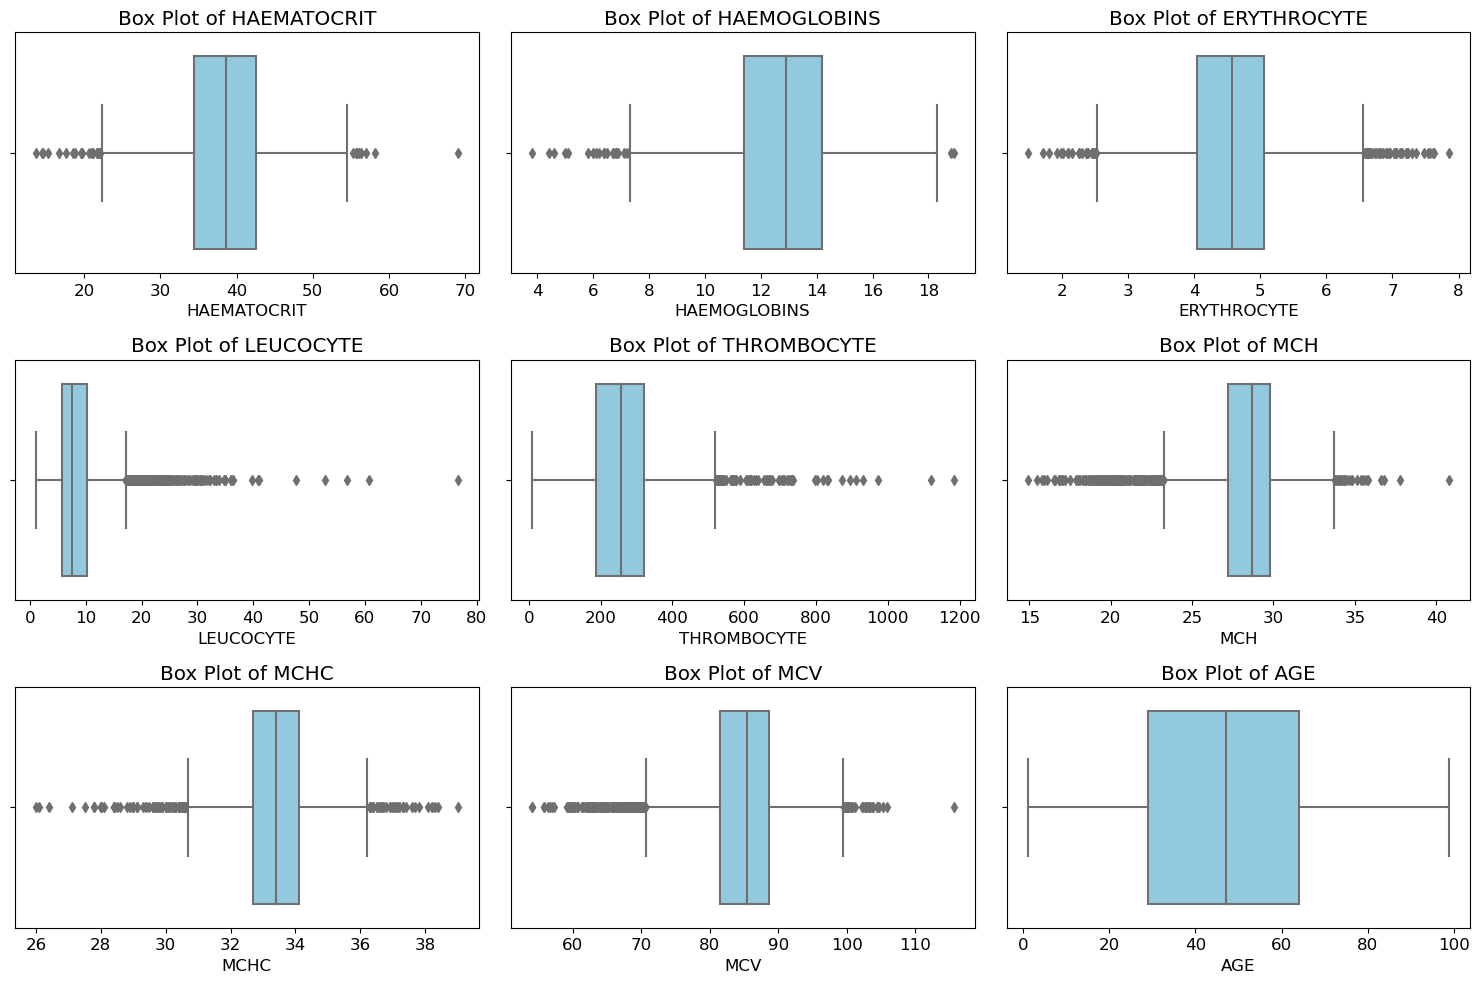

In [9]:
# 2. Box plots to check for outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

### Correlation heatmap

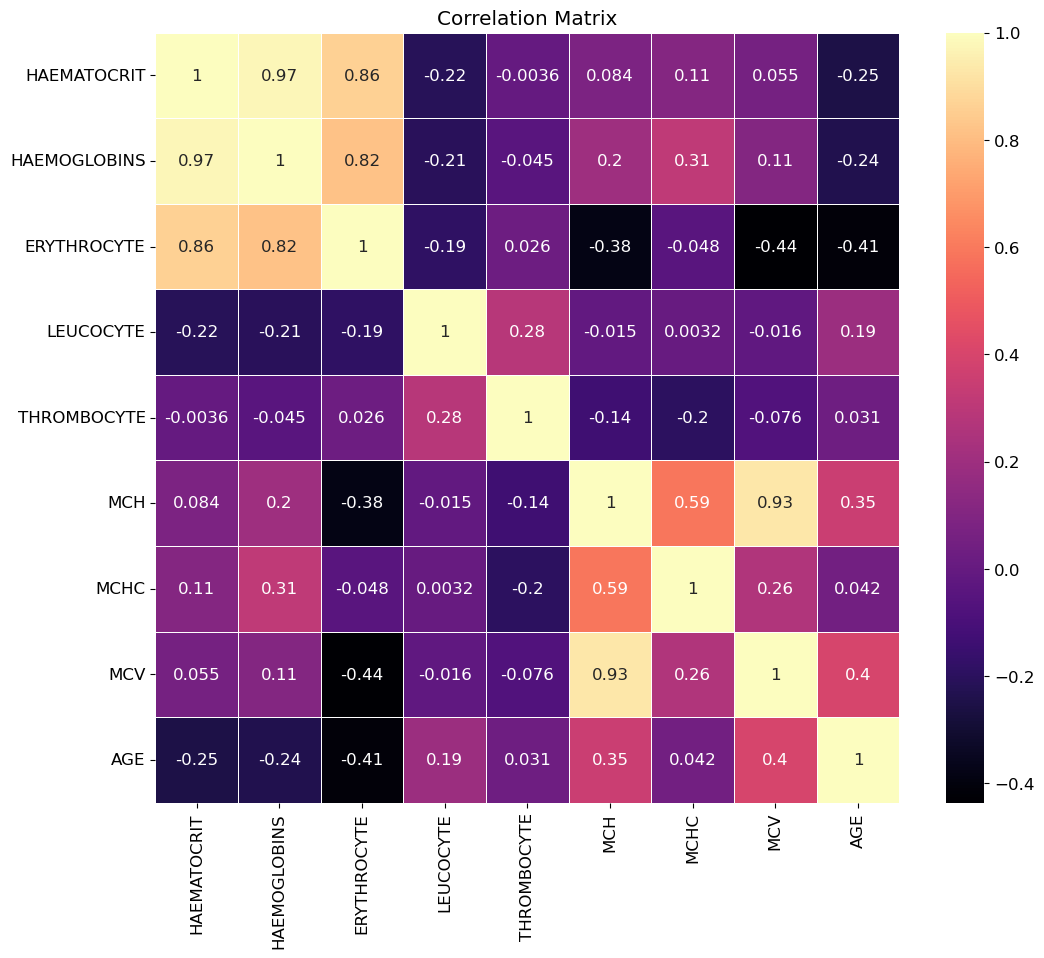

In [10]:
# 3. Correlation heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='magma', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### Count plots for categorical variables

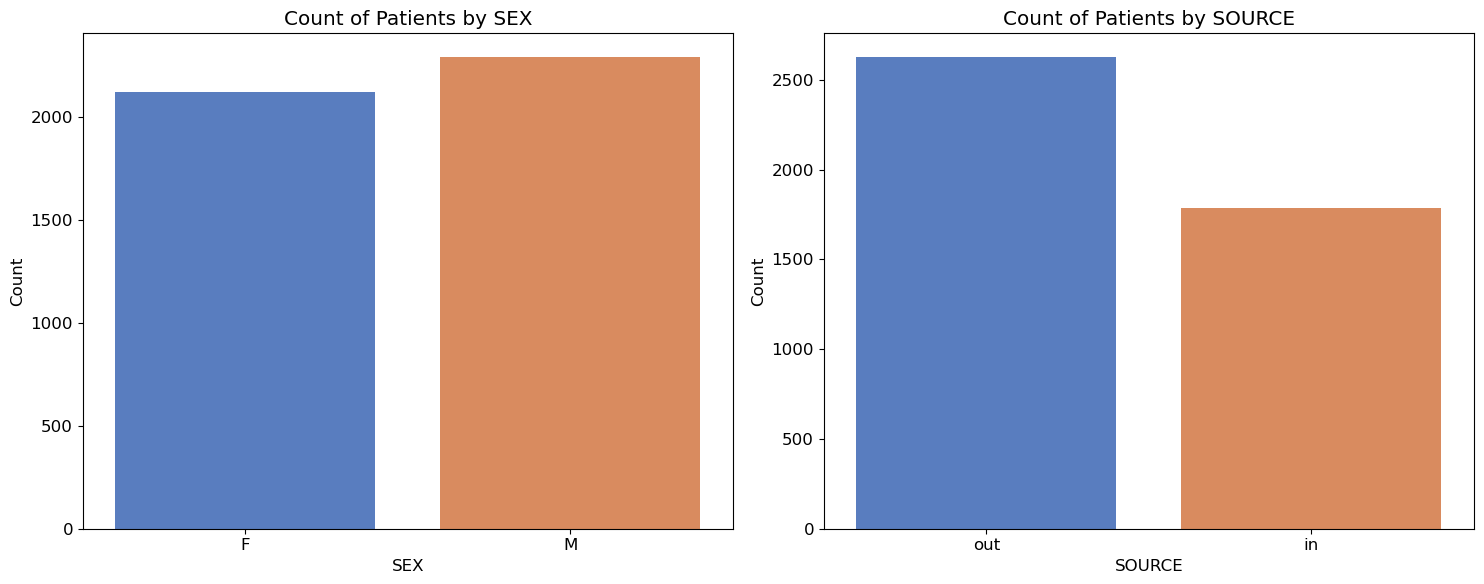

In [11]:
# 4. Count plots for categorical variables
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# First plot: Count of Patients by SEX
sns.countplot(x='SEX', data=df, palette='muted', ax=axes[0])
axes[0].set_title('Count of Patients by SEX')
axes[0].set_xlabel('SEX')
axes[0].set_ylabel('Count')

# Second plot: Count of Patients by SOURCE
sns.countplot(x='SOURCE', data=df, palette='muted', ax=axes[1])
axes[1].set_title('Count of Patients by SOURCE')
axes[1].set_xlabel('SOURCE')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

# Data Preprocessing

## Encode categorical variables

In [12]:
print("\nEncoding Categorical Variables...")

categorical_columns = ['SEX', 'SOURCE']
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()                      
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


Encoding Categorical Variables...


## Handle skewed data using PowerTransformer

The features 'LEUCOCYTE' and 'THROMBOCYTE' were observed to be left skewed in the destribution plots.

In [13]:
skewed_columns = ['LEUCOCYTE', 'THROMBOCYTE']  #  skewed features

# Copy of original columns for comparison
original_df = df[skewed_columns].copy()

# Apply PowerTransformer
print("\nTransforming Skewed Numerical Features...")

pt = PowerTransformer()
df[skewed_columns] = pt.fit_transform(df[skewed_columns])


Transforming Skewed Numerical Features...


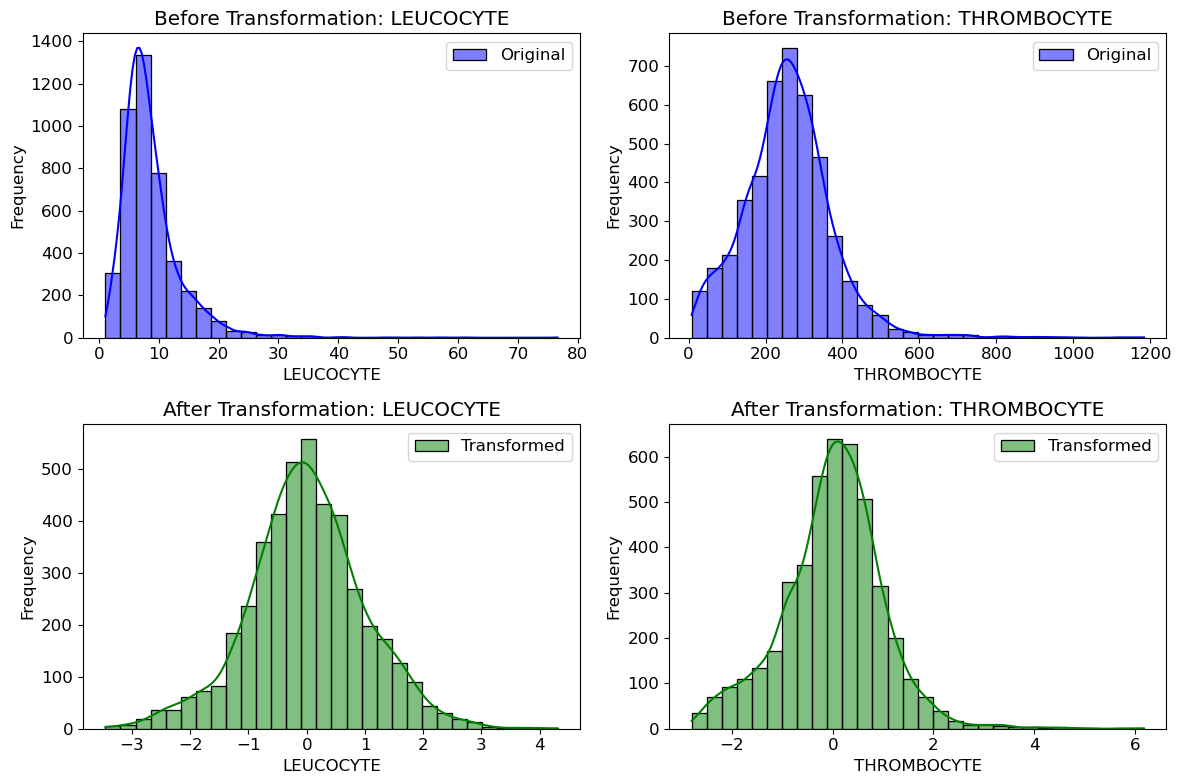

In [14]:
# Plot distributions before and after transformation
plt.figure(figsize=(12, 8))

for i, col in enumerate(skewed_columns):
    # Before transformation
    plt.subplot(2, len(skewed_columns), i + 1)
    sns.histplot(original_df[col], kde=True, bins=30, color='blue', label='Original')
    plt.title(f'Before Transformation: {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.legend()

    # After transformation
    plt.subplot(2, len(skewed_columns), i + 1 + len(skewed_columns))
    sns.histplot(df[col], kde=True, bins=30, color='green', label='Transformed')
    plt.title(f'After Transformation: {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout()
plt.show()

## Feature scaling

In [15]:
print("\nScaling Numerical Features...")

scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])


Scaling Numerical Features...


## Apply PCA for correlated columns

Two groups of correlated columns were observed in correlation heatmap

In [16]:
print("\nApplying PCA to Reduce Correlated Features...")

pca_groups = {
    'group1': ['HAEMATOCRIT', 'HAEMOGLOBINS', 'ERYTHROCYTE'],
    'group2': ['MCH', 'MCV']
}

for group_name, columns in pca_groups.items():
    pca = PCA(n_components=1)
    df[f'{group_name}_PCA'] = pca.fit_transform(df[columns])
    df.drop(columns=columns, inplace=True)

print("\nPCA Completed and Original Correlated Features Dropped.")


Applying PCA to Reduce Correlated Features...

PCA Completed and Original Correlated Features Dropped.


In [17]:
print("Explained variance ratio for PCA:", pca.explained_variance_ratio_)
print("Cumulative explained variance:", np.cumsum(pca.explained_variance_ratio_))

Explained variance ratio for PCA: [0.96590215]
Cumulative explained variance: [0.96590215]


## Check for multicollinearity using VIF

In [18]:
print("\nChecking for Multicollinearity...")
remaining_columns = [col for col in df.columns if col not in categorical_columns]
vif_data = pd.DataFrame()
vif_data["feature"] = remaining_columns
vif_data["VIF"] = [variance_inflation_factor(df[remaining_columns].values, i) for i in range(len(remaining_columns))]
print(vif_data)


Checking for Multicollinearity...
       feature       VIF
0    LEUCOCYTE  1.278594
1  THROMBOCYTE  1.234058
2         MCHC  1.339248
3          AGE  1.366387
4   group1_PCA  1.165096
5   group2_PCA  1.481737


## Outlier handling: Capping extreme outliers

In [19]:
print("\nCapping Extreme Outliers...")
def cap_outliers(df, column, factor=1.5):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - factor * iqr
    upper_bound = q3 + factor * iqr
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

for col in df.columns:
    if col in numerical_columns:
        cap_outliers(df, col)

print("\nOutlier Capping Completed.")


Capping Extreme Outliers...

Outlier Capping Completed.


## Visualizations After preprocessing

### Distribution plots for numerical features after preprocessing

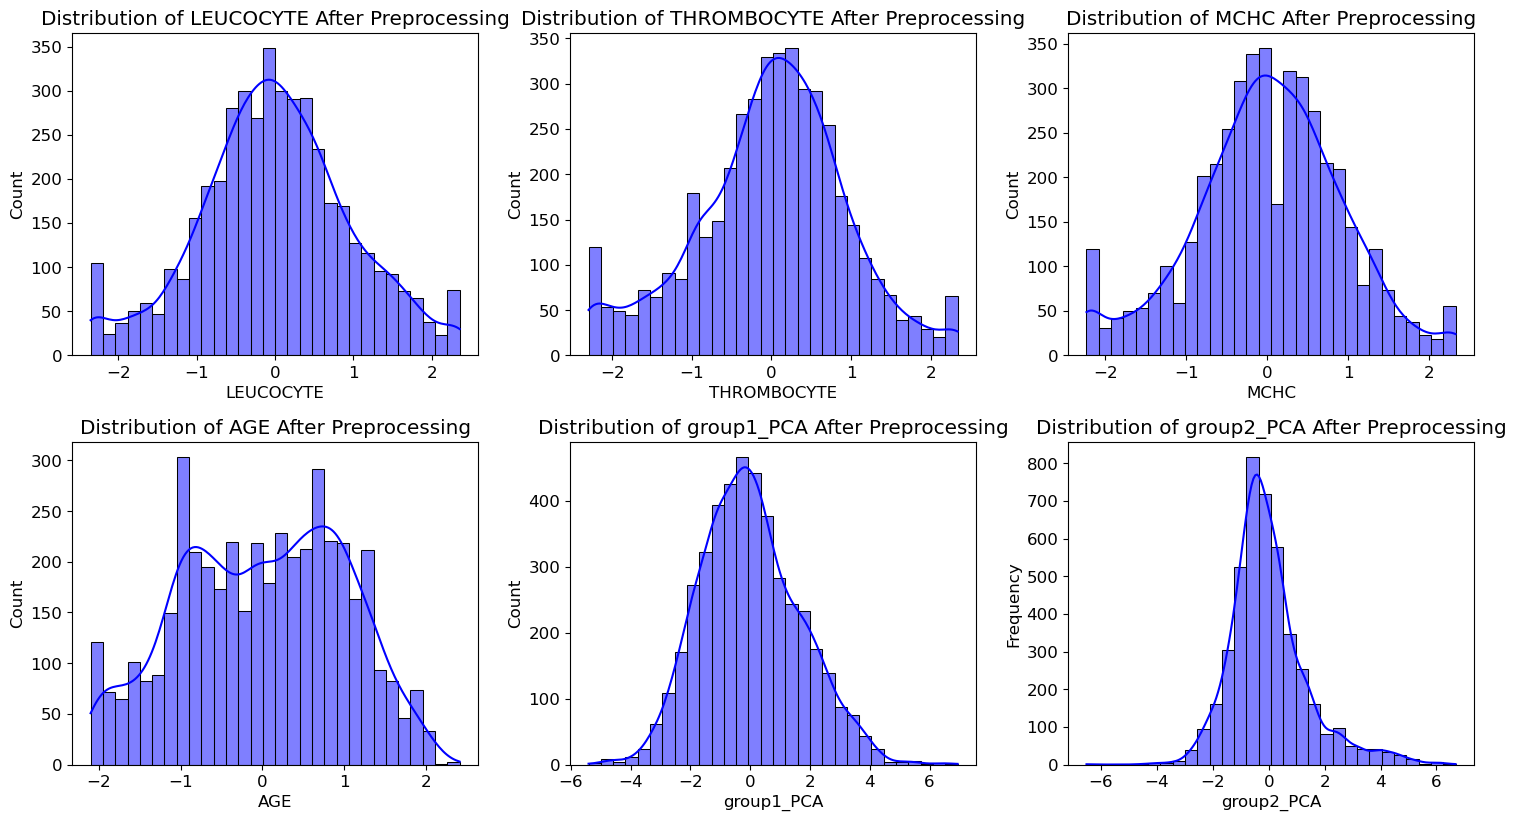

In [20]:
numerical_columns = [col for col in df.columns if col not in categorical_columns]
plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_columns):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {col} After Preprocessing')
plt.xlabel(col)
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

### box plots to check for outliers after preprocessing

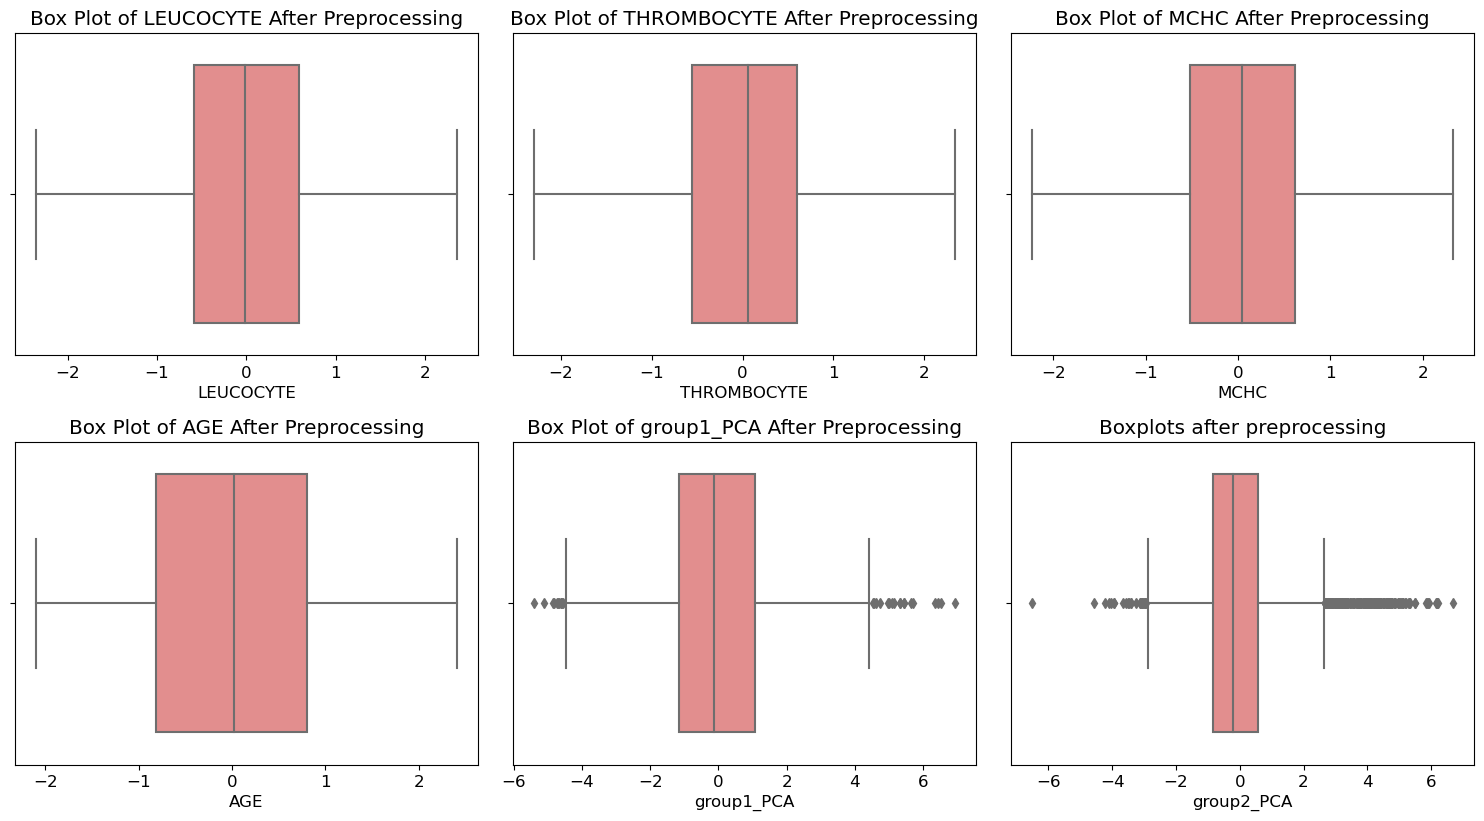

In [21]:
plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_columns):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=df[col], color='lightcoral')
    plt.title(f'Box Plot of {col} After Preprocessing')
    plt.xlabel(col)
plt.tight_layout()
plt.title(f'Boxplots after preprocessing')
plt.show()

### Correlation heatmap after preprocessing

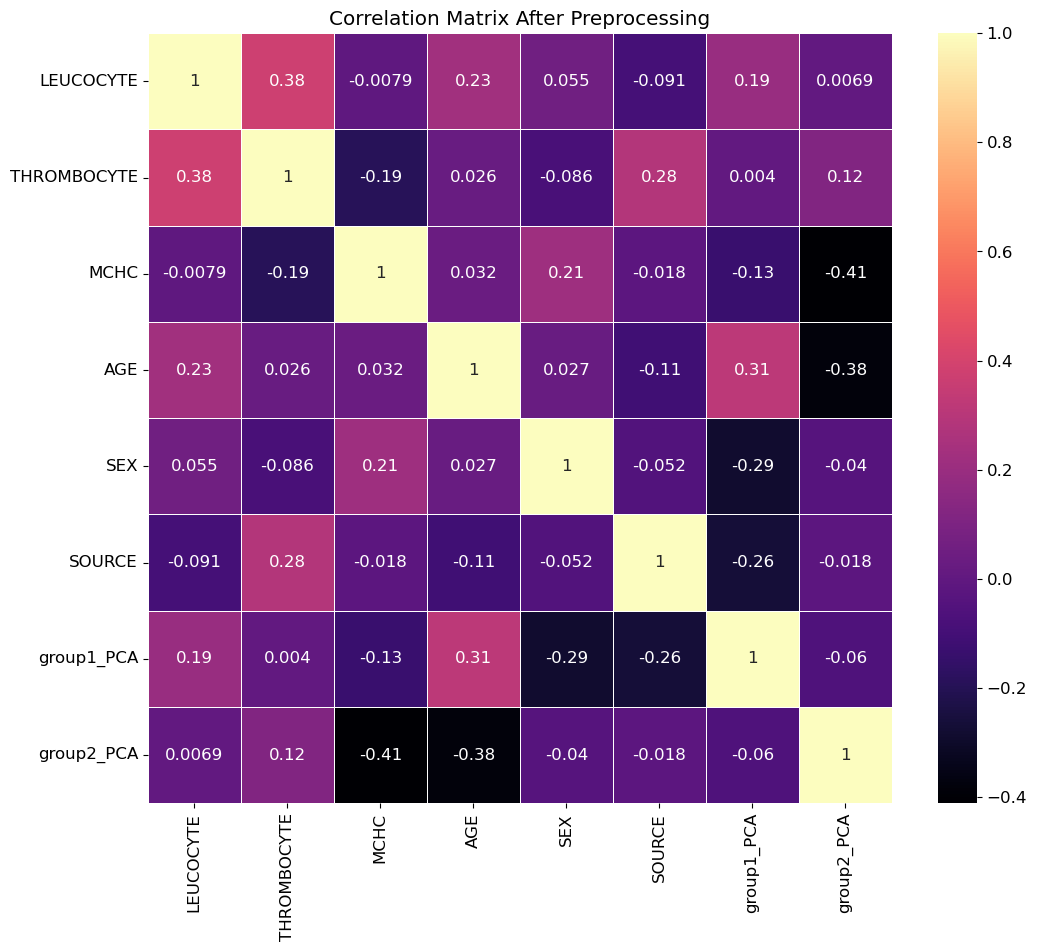

In [22]:
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='magma', linewidths=0.5)
plt.title('Correlation Matrix After Preprocessing')
plt.show()

# Storing the Clean Data

In [23]:
# Final dataset information
print("\nFinal Dataset Information:")
df.info()


Final Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4412 entries, 0 to 4411
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LEUCOCYTE    4412 non-null   float64
 1   THROMBOCYTE  4412 non-null   float64
 2   MCHC         4412 non-null   float64
 3   AGE          4412 non-null   float64
 4   SEX          4412 non-null   int32  
 5   SOURCE       4412 non-null   int32  
 6   group1_PCA   4412 non-null   float64
 7   group2_PCA   4412 non-null   float64
dtypes: float64(6), int32(2)
memory usage: 241.4 KB


In [24]:
# Dataset ready for splitting
print("\nDataset is now preprocessed and ready for splitting into training and testing sets.")

# Save the cleaned dataset to CSV
print("\nSaving the cleaned dataset to CSV...")
df.to_csv('cleaned_data.csv', index=False)
print("Cleaned dataset saved as 'cleaned_data.csv'.")


Dataset is now preprocessed and ready for splitting into training and testing sets.

Saving the cleaned dataset to CSV...
Cleaned dataset saved as 'cleaned_data.csv'.
